In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))
datax_reshape = datax.reshape([datax.shape[0] , datax.shape[1]*datax.shape[2]])
datax_reshape_norm = datax_reshape/255
#print('최대 : {}, 최소 : {}'.format(np.max(datax_reshape_norm), np.min(datax_reshape_norm)))
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])
# Train, Test Data Split
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_reshape_norm, datay_onehot, test_size = 0.3, random_state =111)

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [3]:
input_shape = (datax_reshape_norm.shape[1], )

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(300,activation = 'relu')(visible)
output =  layers.Dense(10,activation = 'softmax')(hidden1)

mlp_function = models.Model(visible,output)
mlp_function.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
mlp_function.compile(optimizer='RMsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(trnx, trny, validation_data = [tstx,tsty], batch_size=50, epochs=100)


Epoch 1/100
840/840 [==============================] - 9s 9ms/step - loss: 0.2686 - accuracy: 0.9224 - val_loss: 0.1530 - val_accuracy: 0.9531
Epoch 2/100
840/840 [==============================] - 7s 8ms/step - loss: 0.1167 - accuracy: 0.9657 - val_loss: 0.1267 - val_accuracy: 0.9635
Epoch 3/100
840/840 [==============================] - 5s 6ms/step - loss: 0.0795 - accuracy: 0.9751 - val_loss: 0.1077 - val_accuracy: 0.9684
Epoch 4/100
840/840 [==============================] - 7s 8ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0942 - val_accuracy: 0.9723
Epoch 5/100
840/840 [==============================] - 7s 8ms/step - loss: 0.0465 - accuracy: 0.9862 - val_loss: 0.1008 - val_accuracy: 0.9722
Epoch 6/100
840/840 [==============================] - 7s 9ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0963 - val_accuracy: 0.9741
Epoch 7/100
840/840 [==============================] - 6s 8ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.0920 - val_accuracy: 0.9761

840/840 [==============================] - 7s 9ms/step - loss: 6.9965e-09 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.9791
Epoch 58/100
840/840 [==============================] - 6s 8ms/step - loss: 6.8744e-09 - accuracy: 1.0000 - val_loss: 0.2287 - val_accuracy: 0.9791
Epoch 59/100
840/840 [==============================] - 7s 8ms/step - loss: 6.6048e-09 - accuracy: 1.0000 - val_loss: 0.2300 - val_accuracy: 0.9791
Epoch 60/100
840/840 [==============================] - 7s 9ms/step - loss: 6.7296e-09 - accuracy: 1.0000 - val_loss: 0.2299 - val_accuracy: 0.9791
Epoch 61/100
840/840 [==============================] - 6s 7ms/step - loss: 6.5452e-09 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9791
Epoch 62/100
840/840 [==============================] - 7s 8ms/step - loss: 6.3891e-09 - accuracy: 1.0000 - val_loss: 0.2313 - val_accuracy: 0.9791
Epoch 63/100
840/840 [==============================] - 6s 8ms/step - loss: 6.2216e-09 - accuracy: 1.0000 - val_loss: 0.2326 

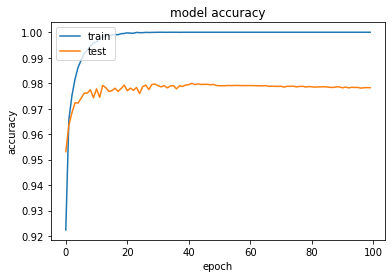

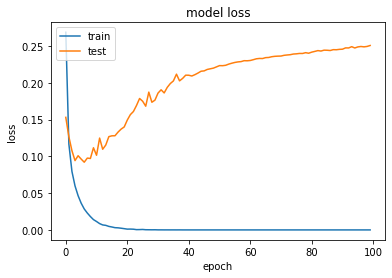

0.9782222509384155
0.9799444675445557


In [5]:
# 학습과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Train data / Test Data Loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 
print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))

In [4]:
input_shape = (datax_reshape_norm.shape[1], )

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(50,activation = 'relu')(visible)
hidden2 = layers.Dense(200,activation = 'relu')(hidden1)
hidden3 = layers.Dense(50,activation = 'relu')(hidden2)

output =  layers.Dense(10,activation = 'softmax')(hidden3)

mlp_function = models.Model(visible,output)
mlp_function.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 200)               10200     
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 60,010
Trainable params: 60,010
Non-trainable params: 0
_________________________________________________________________


In [5]:
mlp_function.compile(optimizer='RMsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(trnx, trny, validation_data = [tstx,tsty], batch_size=50, epochs=100)

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 0.3348 - accuracy: 0.9014 - val_loss: 0.1751 - val_accuracy: 0.9477
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1525 - accuracy: 0.9544 - val_loss: 0.1473 - val_accuracy: 0.9541
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9655 - val_loss: 0.1281 - val_accuracy: 0.9610
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9726 - val_loss: 0.1342 - val_accuracy: 0.9645
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9777 - val_loss: 0.1226 - val_accuracy: 0.9662
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.1106 - val_accuracy: 0.9713
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9825 - val_loss: 0.1159 - val_accuracy: 0.9702

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.5200 - val_accuracy: 0.9696
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0086 - accuracy: 0.9982 - val_loss: 0.4776 - val_accuracy: 0.9728
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.5437 - val_accuracy: 0.9689
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 0.5157 - val_accuracy: 0.9720
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.5200 - val_accuracy: 0.9715
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.5371 - val_accuracy: 0.9716
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.5160 - val_accuracy:

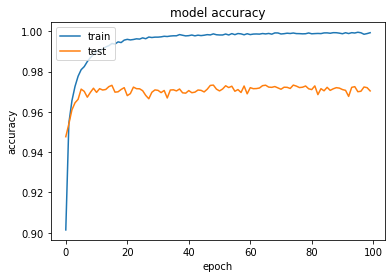

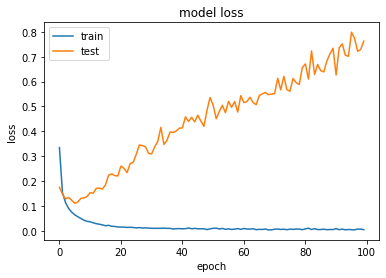

0.9703888893127441
0.9732778072357178


In [6]:
# 학습과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Train data / Test Data Loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 
print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))

In [7]:
input_shape = (datax_reshape_norm.shape[1], )

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(1000,activation = 'relu')(visible)
hidden2 = layers.Dense(1500,activation = 'relu')(hidden1)
hidden3 = layers.Dense(1000,activation = 'relu')(hidden2)

output =  layers.Dense(10,activation = 'softmax')(hidden3)

mlp_function = models.Model(visible,output)
mlp_function.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dense_5 (Dense)             (None, 1500)              1501500   
                                                                 
 dense_6 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_7 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,797,510
Trainable params: 3,797,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
mlp_function.compile(optimizer='RMsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(trnx, trny, validation_data = [tstx,tsty], batch_size=50, epochs=100)

Epoch 1/100
840/840 [==============================] - 47s 56ms/step - loss: 0.2754 - accuracy: 0.9223 - val_loss: 0.1328 - val_accuracy: 0.9617
Epoch 2/100
840/840 [==============================] - 44s 53ms/step - loss: 0.1488 - accuracy: 0.9640 - val_loss: 0.1990 - val_accuracy: 0.9564
Epoch 3/100
840/840 [==============================] - 42s 50ms/step - loss: 0.1173 - accuracy: 0.9720 - val_loss: 0.1661 - val_accuracy: 0.9716
Epoch 4/100
840/840 [==============================] - 42s 51ms/step - loss: 0.1000 - accuracy: 0.9768 - val_loss: 0.3902 - val_accuracy: 0.9546
Epoch 5/100
840/840 [==============================] - 42s 50ms/step - loss: 0.0937 - accuracy: 0.9802 - val_loss: 0.1538 - val_accuracy: 0.9782
Epoch 6/100
840/840 [==============================] - 45s 53ms/step - loss: 0.0830 - accuracy: 0.9820 - val_loss: 0.1917 - val_accuracy: 0.9752
Epoch 7/100
840/840 [==============================] - 46s 55ms/step - loss: 0.0716 - accuracy: 0.9842 - val_loss: 0.2742 - val_ac

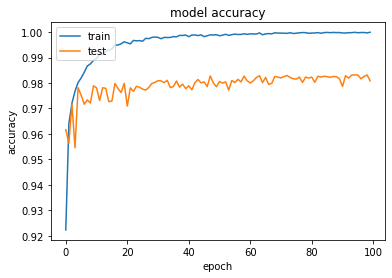

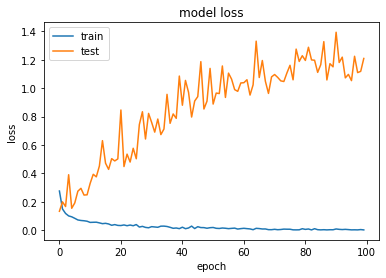

0.9808889031410217
0.9831666946411133


In [9]:
# 학습과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Train data / Test Data Loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 
print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))